In [118]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np

# this allows plots to appear directly in the notebook
%matplotlib inline

In [2]:
#reading data from excel file
file = pd.read_excel("tweets.xlsx")

In [3]:
#looking at data to get a understanding of the data
file.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,...,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,1,0,...,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",NaN,NaN,NaN,0,0,...,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",NaN,NaN,NaN,1,0,...,"Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,NaN,3065,0,...,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [4]:
#getting total number of rows and columns
file.shape

(42368, 32)

In [5]:
#getting stats foe each column
file.describe()


/home/arpit/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,TweetID,TweetInReplyToStatusID,TweetInReplyToUserID,TweetRetweetCount,TweetFavoritesCount,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber
count,4.236800e+04,1.010000e+02,1.890000e+02,42368.000000,42368.000000,0.0,0.0,4.236800e+04,4.236800e+04,42368.000000,42368.000000,4.236800e+04,42368.000000
mean,8.110767e+17,8.107005e+17,6.489163e+16,1081.095402,0.805561,NaN,NaN,3.398540e+17,6.196995e+03,3859.351846,312.092546,3.777249e+04,226.111688
std,4.408380e+13,2.581401e+15,2.140714e+17,1432.473561,37.214059,NaN,NaN,3.799438e+17,5.620006e+04,19345.980461,850.623581,9.001777e+04,128.720271
min,8.110045e+17,7.860072e+17,3.389391e+06,0.000000,0.000000,NaN,NaN,1.968000e+03,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000
25%,8.110410e+17,NaN,NaN,0.000000,0.000000,NaN,NaN,5.862261e+08,4.000000e+01,40.000000,17.000000,2.793500e+03,115.000000
50%,8.110762e+17,NaN,NaN,14.000000,0.000000,NaN,NaN,4.610624e+09,1.490000e+02,304.000000,41.000000,1.989700e+04,227.000000
75%,8.111137e+17,NaN,NaN,3069.000000,0.000000,NaN,NaN,7.662723e+17,1.819250e+03,1780.000000,217.000000,3.327400e+04,337.000000
max,8.111635e+17,8.111578e+17,8.016277e+17,4056.000000,2813.000000,NaN,NaN,8.111532e+17,4.572706e+06,689302.000000,26577.000000,2.064424e+06,449.000000


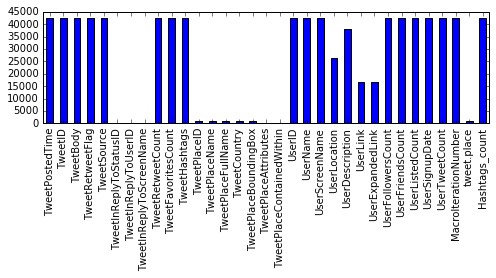

In [117]:
#to check empty cells in each feature variable
z1=file.count()
plt.figure(figsize=(8,2))
z2=z1.plot(kind="bar")
z3=z2.get_figure()
z3.savefig('asd3.png',dpi=100)

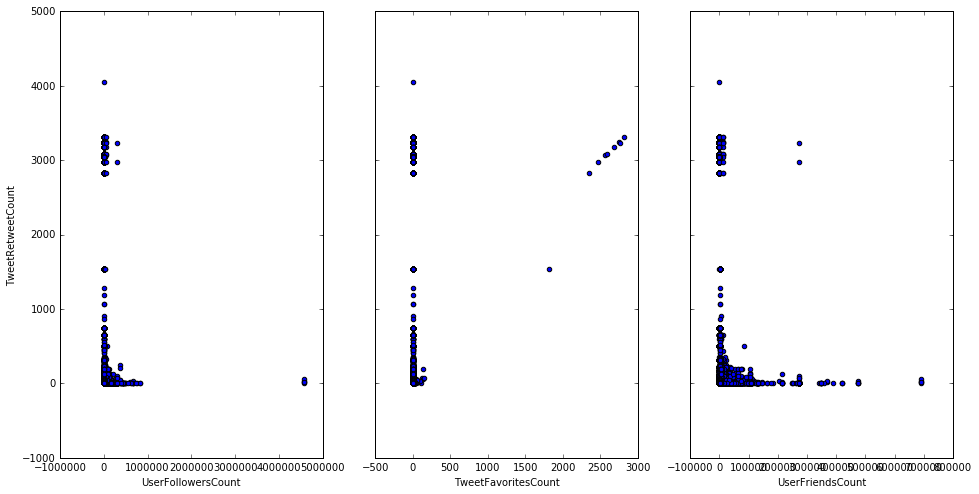

In [86]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
file.plot(kind='scatter', x='UserFollowersCount', y='TweetRetweetCount',ax=axs[0],figsize=(16,8))
file.plot(kind='scatter', x='TweetFavoritesCount', y='TweetRetweetCount', ax=axs[1])
file.plot(kind='scatter', x='UserFriendsCount', y='TweetRetweetCount', ax=axs[2])
fig.savefig('asd1.png')

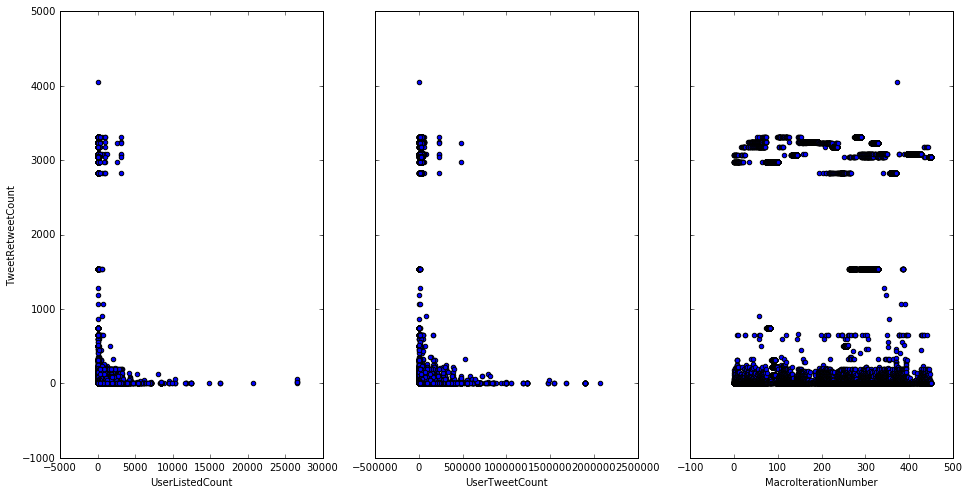

In [87]:
# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 3, sharey=True)
file.plot(kind='scatter', x='UserListedCount', y='TweetRetweetCount',ax=axs[0],figsize=(16,8))
file.plot(kind='scatter', x='UserTweetCount', y='TweetRetweetCount', ax=axs[1])
file.plot(kind='scatter', x='MacroIterationNumber', y='TweetRetweetCount', ax=axs[2])
fig.savefig('asd2.png')

In [10]:
#creating a new feature of count of hashtags within a tweet
Hashtags_count = []
file.TweetHashtags.fillna("a",inplace=True)
for i in range(len(file.TweetHashtags)):
    if file.TweetHashtags[i]== "a":
        Hashtags_count.append(0)
    else:
        Hashtags_count.append((len([j for j in file.TweetHashtags[i].split(",")])))

In [11]:
#adding new feature to the dataframe
file['Hashtags_count']=Hashtags_count

In [12]:
# lets take X be the feature matrix and Y be the target variable
Y= file.TweetRetweetCount
X= file.ix[:, file.columns != 'TweetRetweetCount']

In [13]:
# create a Python list of feature names
feature_cols = ['UserFollowersCount','TweetFavoritesCount','UserFriendsCount','UserListedCount','UserTweetCount','MacroIterationNumber','Hashtags_count']

# use the list to select a subset of the original DataFrame
X1 = X[feature_cols]

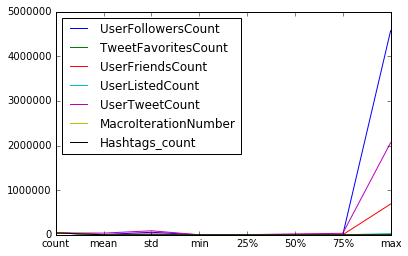

In [84]:
#univariate analysis of the feature columns
z=X1.describe()

ax = z.plot()
#ax.set_ylim([0,10000000])
fig = ax.get_figure()

fig.savefig('asdf.png')

In [14]:
#splitting the file into train and test (75% rows in train and 25% in test)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y, random_state=1)

In [15]:
#checking train and test files shape
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(31776, 7)
(31776,)
(10592, 7)
(10592,)


## Linear regression on training data and checking on test data

In [16]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

1763.86097309
[  2.32347142e-03   3.69064041e-01  -6.68260334e-03  -3.65783350e-01
   2.77140323e-04   1.55788715e+00  -3.20798228e+02]


In [18]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('UserFollowersCount', 0.0023234714238673649),
 ('TweetFavoritesCount', 0.36906404071565801),
 ('UserFriendsCount', -0.0066826033436032982),
 ('UserListedCount', -0.36578335041043142),
 ('UserTweetCount', 0.00027714032257068966),
 ('MacroIterationNumber', 1.5578871544782416),
 ('Hashtags_count', -320.7982280637014)]

In [123]:
# make predictions on the testing set
Y_pred = linreg.predict(X_test)

In [29]:
#calculating RMSE
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

1152.63504509


In [132]:
Y_pred = linreg.predict(X_test)
r2_score(Y_test,Y_pred)

0.34877612181495554

In [149]:
adjusted_r_square=1-(1- 0.34877612181495554)*(31775/31768)

adjusted_r_square

0.34877612181495554

In [30]:
print("Actual vs Predicted using Linear Regression")
pd.DataFrame({'Predicted Retweet':Y_pred,'Actual Retweets':Y_test})

Actual vs Predicted using Linear Regression


,Actual Retweets,Predicted Retweet
12295,14,-403.977332
37966,3086,2070.031217
808,49,698.428618
948,0,1368.692756
23003,1,-1360.444387
1399,0,1360.650035
39427,3086,2085.597540
25986,3309,1867.887102
1000,14,804.108428
5163,0,1186.944501


## Linear Regression using Cross Validation

In [131]:
lm = LinearRegression()
scores = cross_val_score(lm, X1, Y, cv=13, scoring='neg_mean_squared_error')
print(scores)

[-1132984.21053945 -1127077.36508211  -947762.59561208 -1382374.03303885
 -1879480.77428585 -1867526.45043652 -1459775.80507161 -1186362.68898767
 -1459774.5887404  -1491923.80407413 -1489165.83234217 -1390726.81664113
 -1477979.03896238]


In [126]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[ 1132984.21053945  1127077.36508211   947762.59561208  1382374.03303885
  1879480.77428585  1867526.45043652  1459775.80507161  1186362.68898767
  1459774.5887404   1491923.80407413  1489165.83234217  1390726.81664113
  1477979.03896238]


In [127]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 1064.41731033  1061.63899942   973.53099366  1175.74403381  1370.94156487
  1366.57471455  1208.21182128  1089.2027768   1208.21131792  1221.44332823
  1220.31382535  1179.29081089  1215.72161244]


In [128]:
# calculate the average RMSE
print(rmse_scores.mean())

1181.17254689


## Random Forest on Training Data and Checking on Test Data

In [46]:
rf = RandomForestRegressor(n_estimators=75)
rf.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=75, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [58]:
Y_pred = rf.predict(X_test)

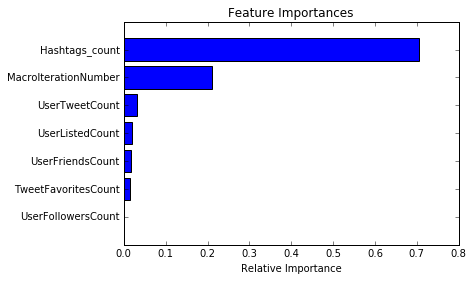

In [154]:
#important features 
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), feature_cols) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()


In [48]:
#calculating RMSE
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

120.60600209


In [60]:
#r square score
r2_score(Y_test,Y_pred)

0.99287008225666129

In [150]:
#adjusted r square
adjusted_r_square=1-(1-0.99287008225666129 )*(31775/31768)

adjusted_r_square

0.9928700822566613

In [32]:
print("Actual vs Predicted using Random Forest")
pd.DataFrame({'Predicted Retweet':Y_pred,'Actual Retweets':Y_test})

Actual vs Predicted using Random Forest


,Actual Retweets,Predicted Retweet
12295,14,4.800000
37966,3086,3086.000000
808,49,61.320000
948,0,310.600000
23003,1,1.700000
1399,0,0.200000
39427,3086,3086.000000
25986,3309,3309.000000
1000,14,18.800000
5163,0,33.400000
